<a href="https://colab.research.google.com/github/Sandip-Nayak/Telecom-Churn-Analysis---Capstone-Project/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [2]:
# Mounting Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing necessary packages 
import pandas as pd
import numpy as np 

In [4]:
# Reading the data stored in Drive
telecom = pd.read_csv('/content/drive/MyDrive/Telecom Churn Analysis - Sandip Nayak/Telecom Churn.csv')

In [5]:
# Let's see the number of rows and columns in the file
print(f'the number of rows and columns are {telecom.shape} respectively.')

the number of rows and columns are (3333, 20) respectively.


In [6]:
# First 10 rows
telecom.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [7]:
# Last 10 rows
telecom.tail(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3323,IN,117,415,No,No,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,No,No,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,No,No,0,106.6,128,18.12,284.8,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [8]:
# Checking the names of all columns 

telecom.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [9]:
# Checking for null values in all columns 
telecom[['State', 'Account length', 'Area code', 'International plan',
'Voice mail plan', 'Number vmail messages', 'Total day minutes',
'Total day calls', 'Total day charge', 'Total eve minutes',
'Total eve calls', 'Total eve charge', 'Total night minutes',
'Total night calls', 'Total night charge', 'Total intl minutes',
'Total intl calls', 'Total intl charge', 'Customer service calls',
'Churn']].isnull()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3329,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# We can fill the missing null values with 'not provided'
telecom[['State', 'Account length', 'Area code', 'International plan',
'Voice mail plan', 'Number vmail messages', 'Total day minutes',
'Total day calls', 'Total day charge', 'Total eve minutes',
'Total eve calls', 'Total eve charge', 'Total night minutes',
'Total night calls', 'Total night charge', 'Total intl minutes',
'Total intl calls', 'Total intl charge', 'Customer service calls',
'Churn']].fillna('not provided', inplace = True)

In [11]:
# Now let's see the info 
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [12]:
# As can be seen above there are no null values present in the dataset.

# Alternate method to check if any column contains a null value
# print(telecom.isnull().any())

In [13]:
# Let us calculate varius values such as count, mean, max, etc. 
# The data has been transcribed to make it more presentable and the values have been rounded off to two decimal places
telecom.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.06,39.82,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.18,42.37,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.10,13.69,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.78,54.47,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.44,20.07,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.56,9.26,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.98,50.71,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.11,19.92,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.08,4.31,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.87,50.57,23.20,167.00,201.20,235.30,395.00


In [14]:
# Finding the unique states 
state_list = list(telecom['State'].unique())
print(state_list)

['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC', 'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND']


In [15]:
# Number of unique states
telecom['State'].nunique()

51

In [16]:
# Counting the number of users each state has and arranging it in a descending order
cust_state_wise = telecom['State'].value_counts()
sort_cust_state_wise = cust_state_wise.sort_values(ascending = False)
print(sort_cust_state_wise)

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
ID     73
VT     73
MI     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64


In [17]:
# Creating a variable to store the information of customers who churned
churn_cust = telecom[telecom['Churn'] != False]
churn_cust

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [18]:
# With the help of above extracted data, we can create a graph to understand the churn rate
# Import matplotlib and seahorn to create graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
# Number of customers who did not go to other service providers 
cust_churn_count = telecom['Churn'].value_counts()
cust_churn_count

# Alternate method
# telecom.groupby('Churn')['Churn'].count() 

False    2850
True      483
Name: Churn, dtype: int64

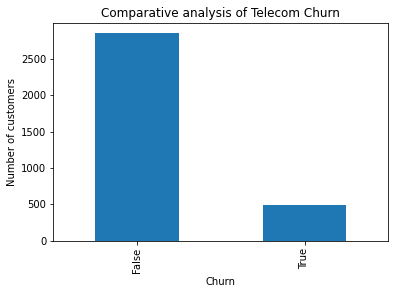

In [20]:
# Plotting a bar graph using matplotlib
cust_churn_count.plot(kind = 'bar')
plt.title('Comparative analysis of Telecom Churn')
plt.ylabel('Number of customers')
plt.xlabel('Churn')
plt.show()

plt.rcParams['figure.figsize'] = (15, 10)

In [23]:
# Calculating the churn rate in percentages
churn_rate = cust_churn_count[1]*100 / cust_churn_count[0]
print('The telecom churn rate for the given time period is', churn_rate.round(2), '%')

The telecom churn rate for the given time period is 16.95 %


In [33]:
telecom.head(3362)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [46]:
# We'll have to find out co-relation between different values
telecom ['total charges'] = telecom['Total day charge'] + telecom['Total eve charge'] + telecom['Total night charge'] + telecom['Total intl charge']

In [47]:
# Checking if the new column was added
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total charges
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


In [55]:
# Grouping the Churn values and total charges
telecom.groupby('Churn')['total charges'].mean()

Churn
False    58.448807
True     65.355963
Name: total charges, dtype: float64

In [154]:
# As can be seen above, churn is directly proportional to the total cost charged upon customers

In [159]:
# State-wise total number of customers
total_cust_state_wise = telecom.groupby('State').count()
total_cust_state_wise.drop(columns = ['Account length', 'Area code', 'International plan', 'Voice mail plan',
                                        'Number vmail messages', 'Total day minutes', 'Total day calls',
                                        'Total day charge', 'Total eve minutes', 'Total eve calls',
                                        'Total eve charge', 'Total night minutes', 'Total night calls',
                                        'Total night charge', 'Total intl minutes', 'Total intl calls',
                                        'Total intl charge', 'Customer service calls', 'total charges'], inplace = True)
df1 = total_cust_state_wise.sort_values(by = 'Churn', ascending = False)

In [161]:
# State-wise churn
state_churn = telecom[(telecom['Churn'] == True)]
true_churn = state_churn.groupby('State').count()
true_churn.drop(columns = ['Account length', 'Area code', 'International plan', 'Voice mail plan',
                                        'Number vmail messages', 'Total day minutes', 'Total day calls',
                                        'Total day charge', 'Total eve minutes', 'Total eve calls',
                                        'Total eve charge', 'Total night minutes', 'Total night calls',
                                        'Total night charge', 'Total intl minutes', 'Total intl calls',
                                        'Total intl charge', 'Customer service calls', 'total charges'], inplace = True)
df2 = true_churn.sort_values(by = 'Churn', ascending = False)

In [167]:
# Merge df1 and df2


State                     False
Account length            False
Area code                 False
International plan        False
Voice mail plan           False
Number vmail messages     False
Total day minutes         False
Total day calls           False
Total day charge          False
Total eve minutes         False
Total eve calls           False
Total eve charge          False
Total night minutes       False
Total night calls         False
Total night charge        False
Total intl minutes        False
Total intl calls          False
Total intl charge         False
Customer service calls    False
Churn                     False
dtype: bool
